# Manejo Basico de Imagenes
Disclaimer: As mentioned in class this Notebook only covers exercise 4.6

_"4.6.A la imagen “lena_color_512.tif” pasarla a grises, y aplicarle un filtro Gausiano y uno laplaciano,\
despliegue las imágenes resultantes. Compare sus resultados e investigue porque es preferible\
utilizar un filtro basado en el modelo Gausiano."_

#### In this exercise we will focus on basic altering of images.
More specifically we will look at grey scaling and filters\
Let's start by importing the image. The exercise states the filename as “lena_color_512.tif”.\
As there is no such file in the resources we will assume lenaOrig.jpg was meant.

Let's start by importing the needed libraries and the file


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

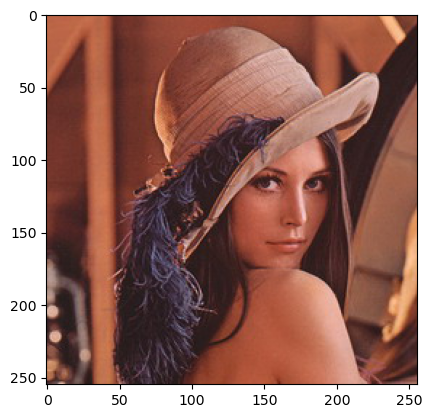

In [2]:
# loading the image and displaying it
img = cv2.imread('./lenaOrig.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

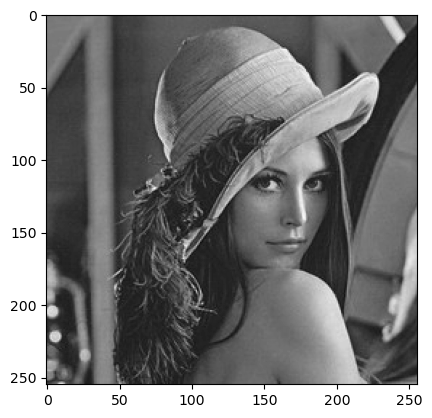

In [3]:
# grayscaling the image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

### Great this worked fine 
### Next we will start applying the filters to the image 
We will use a Laplacian filter as well as a Gaussian one.\
We will plot the images afterwards to get insights on what we did and what the differences are.

As no values were given regarding the kernelsizes or sigma (neither for the gaussian nor the laplacian filter),\
we will set the kernelsize for both to 5 and use a sigma of 2 for the gaussian filter.

Let's start with the gaussian filter

In [4]:
# Gaussian filter
gauss = cv2.GaussianBlur(img_gray, (5, 5), 2)

# Laplacian filter
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=5)
laplacian_abs = cv2.convertScaleAbs(laplacian)

Text(0.5, 1.0, 'Laplacian Filter Abs')

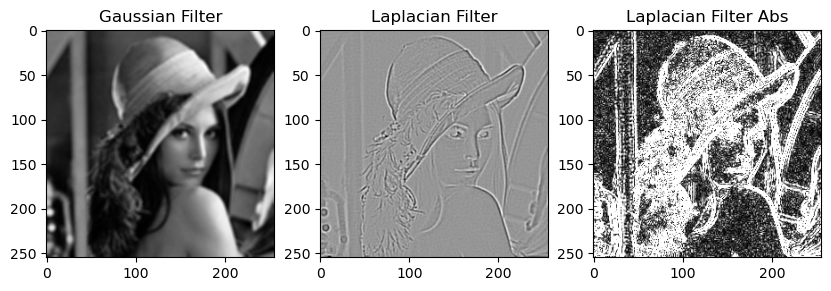

In [5]:
# plotting the two images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(gauss, cmap='gray')
plt.title('Gaussian Filter')

plt.subplot(1, 3, 2)  
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filter')

plt.subplot(1, 3, 3)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Filter Abs')

# Results and Discussion

### Gaussian-Filter:
**What it does:** Smooths the image by reducing noise using a weighting based on the normal (Gaussian) distribution.

**Result:** The image looks “softer” or blurry, which is useful for removing small variations or noise without completely\ 
removing relevant information.

**Advantage:** It is less sensitive to abrupt changes or noise in the image and is therefore often used as a preliminary\
step to edge detection techniques (e.g. in the Canny detector).

<br/><br/>

### Laplacian-Filter: 
**What it does:** highlights areas of abrupt change in intensity (edges) by calculating the second derivative of the image.

**Result**: The resulting image shows the edges very sharply, but also highlights noise, since it involves rapid intensity changes.

**Disadvantage**: It is very sensitive to noise, which may cause unwanted details to be highlighted.

<br/><br/>

### Why is it preferable to use a filter based on the Gaussian model?

**Noise Reduction:**\
The Gaussian filter removes much of the noise present in the image, which is essential for more reliable results in further analysis (such as edge detection).\
Preservation of Important Structures: By gradually smoothing the image, relevant contours and structures are preserved without generating false detections.

**Effective Preprocessing:**\
Many algorithms (e.g., the Canny detector) use Gaussian smoothing as a preprocessing step to improve edge detection and prevent noise from adversely affecting the analysis.\
In summary, although the Laplacian filter is useful for edge detection, its high sensitivity to noise can lead to unreliable results.\
The Gaussian filter, by smoothing the image before applying other algorithms, provides a more solid basis for further analysis.
